In [1]:
import pandas as pd

Each entry of the flights.csv file corresponds to a flight and we see that more than 5'800'000 flights have been recorded in 2015. These flights are described according to 31 variables. A description of these variables can be found here and I briefly recall the meaning of the variables that will be used in this notebook:

YEAR, MONTH, DAY, DAY_OF_WEEK: dates of the flight
AIRLINE: An identification number assigned by US DOT to identify a unique airline
ORIGIN_AIRPORT and DESTINATION_AIRPORT: code attributed by IATA to identify the airports
SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL : scheduled times of take-off and landing
DEPARTURE_TIME and ARRIVAL_TIME: real times at which take-off and landing took place
DEPARTURE_DELAY and ARRIVAL_DELAY: difference (in minutes) between planned and real times
DISTANCE: distance (in miles)
An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports:

# Import CSV 

In [9]:
df = pd.read_csv(r"./airline_dataset/flights.csv")

<positron-console-cell-9>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.


In [10]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


CHECKING is 

            DEPARTURE_DELAY = DEPARTURE_TIME - SCHEDULED_DEPARTURE  
            ARRIVAL_DELAY = ARRIVAL_TIME - SCHEDULED_ARRIVAL ,       

IF not, then drop the row

In [46]:
df["calculate_DEPARTURE_DELAY"] = df["DEPARTURE_TIME"] - df["SCHEDULED_DEPARTURE"]# adding a calculate value
df["checking_DEPARTURE_DELAY"] = df["calculate_DEPARTURE_DELAY"] == df["DEPARTURE_DELAY"] # checking the calculate_DEPARTURE_DELAY is the same or not
df["checking_DEPARTURE_DELAY"].value_counts() # counting the number of True or False

checking_DEPARTURE_DELAY
True     4426902
False    1392177
Name: count, dtype: int64

In [47]:
df["calculate_ARRIVAL_DELAY"] = df["ARRIVAL_TIME"] - df["SCHEDULED_ARRIVAL"]# adding a calculate value
df["checking_ARRIVAL_DELAY"] = df["calculate_ARRIVAL_DELAY"] == df["ARRIVAL_DELAY"] # checking the calculate_DEPARTURE_DELAY is the same or not
df["checking_ARRIVAL_DELAY"].value_counts() # counting the number of True or False

checking_ARRIVAL_DELAY
True     4127897
False    1691182
Name: count, dtype: int64

In [ ]:
df_correct_calculation = df.loc[(df["checking_DEPARTURE_DELAY"] == True) & (df["checking_ARRIVAL_DELAY"] == True)]

Recreate a df table for the most important valuable : YEAR	MONTH	DAY AIRLINE FLIGHT_NUMBER	TAIL_NUMBER	ORIGIN_AIRPORT	DESTINATION_AIRPORT DEPARTURE_DELAY , ARRIVAL_DELAY ,DISTANCE

AND Drop NA

In [ ]:
# Extra data cleaning: Filter DEPARTURE_TIME and ARRIVAL_TIME > 0
print("Before filtering DEPARTURE_TIME and ARRIVAL_TIME > 0:")
print(f"Number of records: {len(df_correct_calculation_cleaned):,}")

# Filter out records where DEPARTURE_TIME or ARRIVAL_TIME <= 0
df_correct_calculation_cleaned = df_correct_calculation_cleaned[
    (df_correct_calculation_cleaned['DEPARTURE_TIME'] > 0) & 
    (df_correct_calculation_cleaned['ARRIVAL_TIME'] > 0)
]

print("After filtering DEPARTURE_TIME and ARRIVAL_TIME > 0:")
print(f"Number of records: {len(df_correct_calculation_cleaned):,}")
print(f"Records removed: {3_460_894 - len(df_correct_calculation_cleaned):,}")

# Show sample of the cleaned data
print("\nSample of cleaned data:")
df_correct_calculation_cleaned.head()


In [80]:
df_correct_calculation = df_correct_calculation[['YEAR','MONTH','DAY','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY' , 'ARRIVAL_DELAY','DISTANCE']]
df_correct_calculation_cleaned = df_correct_calculation.dropna()
df_correct_calculation_cleaned

,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE
1,2015,1,1,AA,2336,N3KUAA,LAX,PBI,-8.0,-9.0,2330
2,2015,1,1,US,840,N171US,SFO,CLT,-2.0,5.0,2296
5,2015,1,1,DL,806,N3730B,SFO,MSP,-5.0,8.0,1589
6,2015,1,1,NK,612,N635NK,LAS,MSP,-6.0,-17.0,1299
8,2015,1,1,AA,1112,N3LAAA,SFO,DFW,-11.0,-13.0,1464
...,...,...,...,...,...,...,...,...,...,...,...
5819066,2015,12,31,UA,1849,N497UA,LAS,EWR,-2.0,-24.0,2227
5819067,2015,12,31,AA,2342,N3DLAA,DEN,MIA,-8.0,-18.0,1709
5819075,2015,12,31,B6,745,N828JB,JFK,PSE,-4.0,-16.0,1617
5819076,2015,12,31,B6,1503,N913JB,JFK,SJU,-9.0,-8.0,1598


In this project, I am gooing to divided into a few parts. To see the relationship between different valuables.

1st: grouping month   
2nd: group by airline     
3rd: DISTANCE vs Delay

1st Group by month see the distribution 
drop the 早到 delay

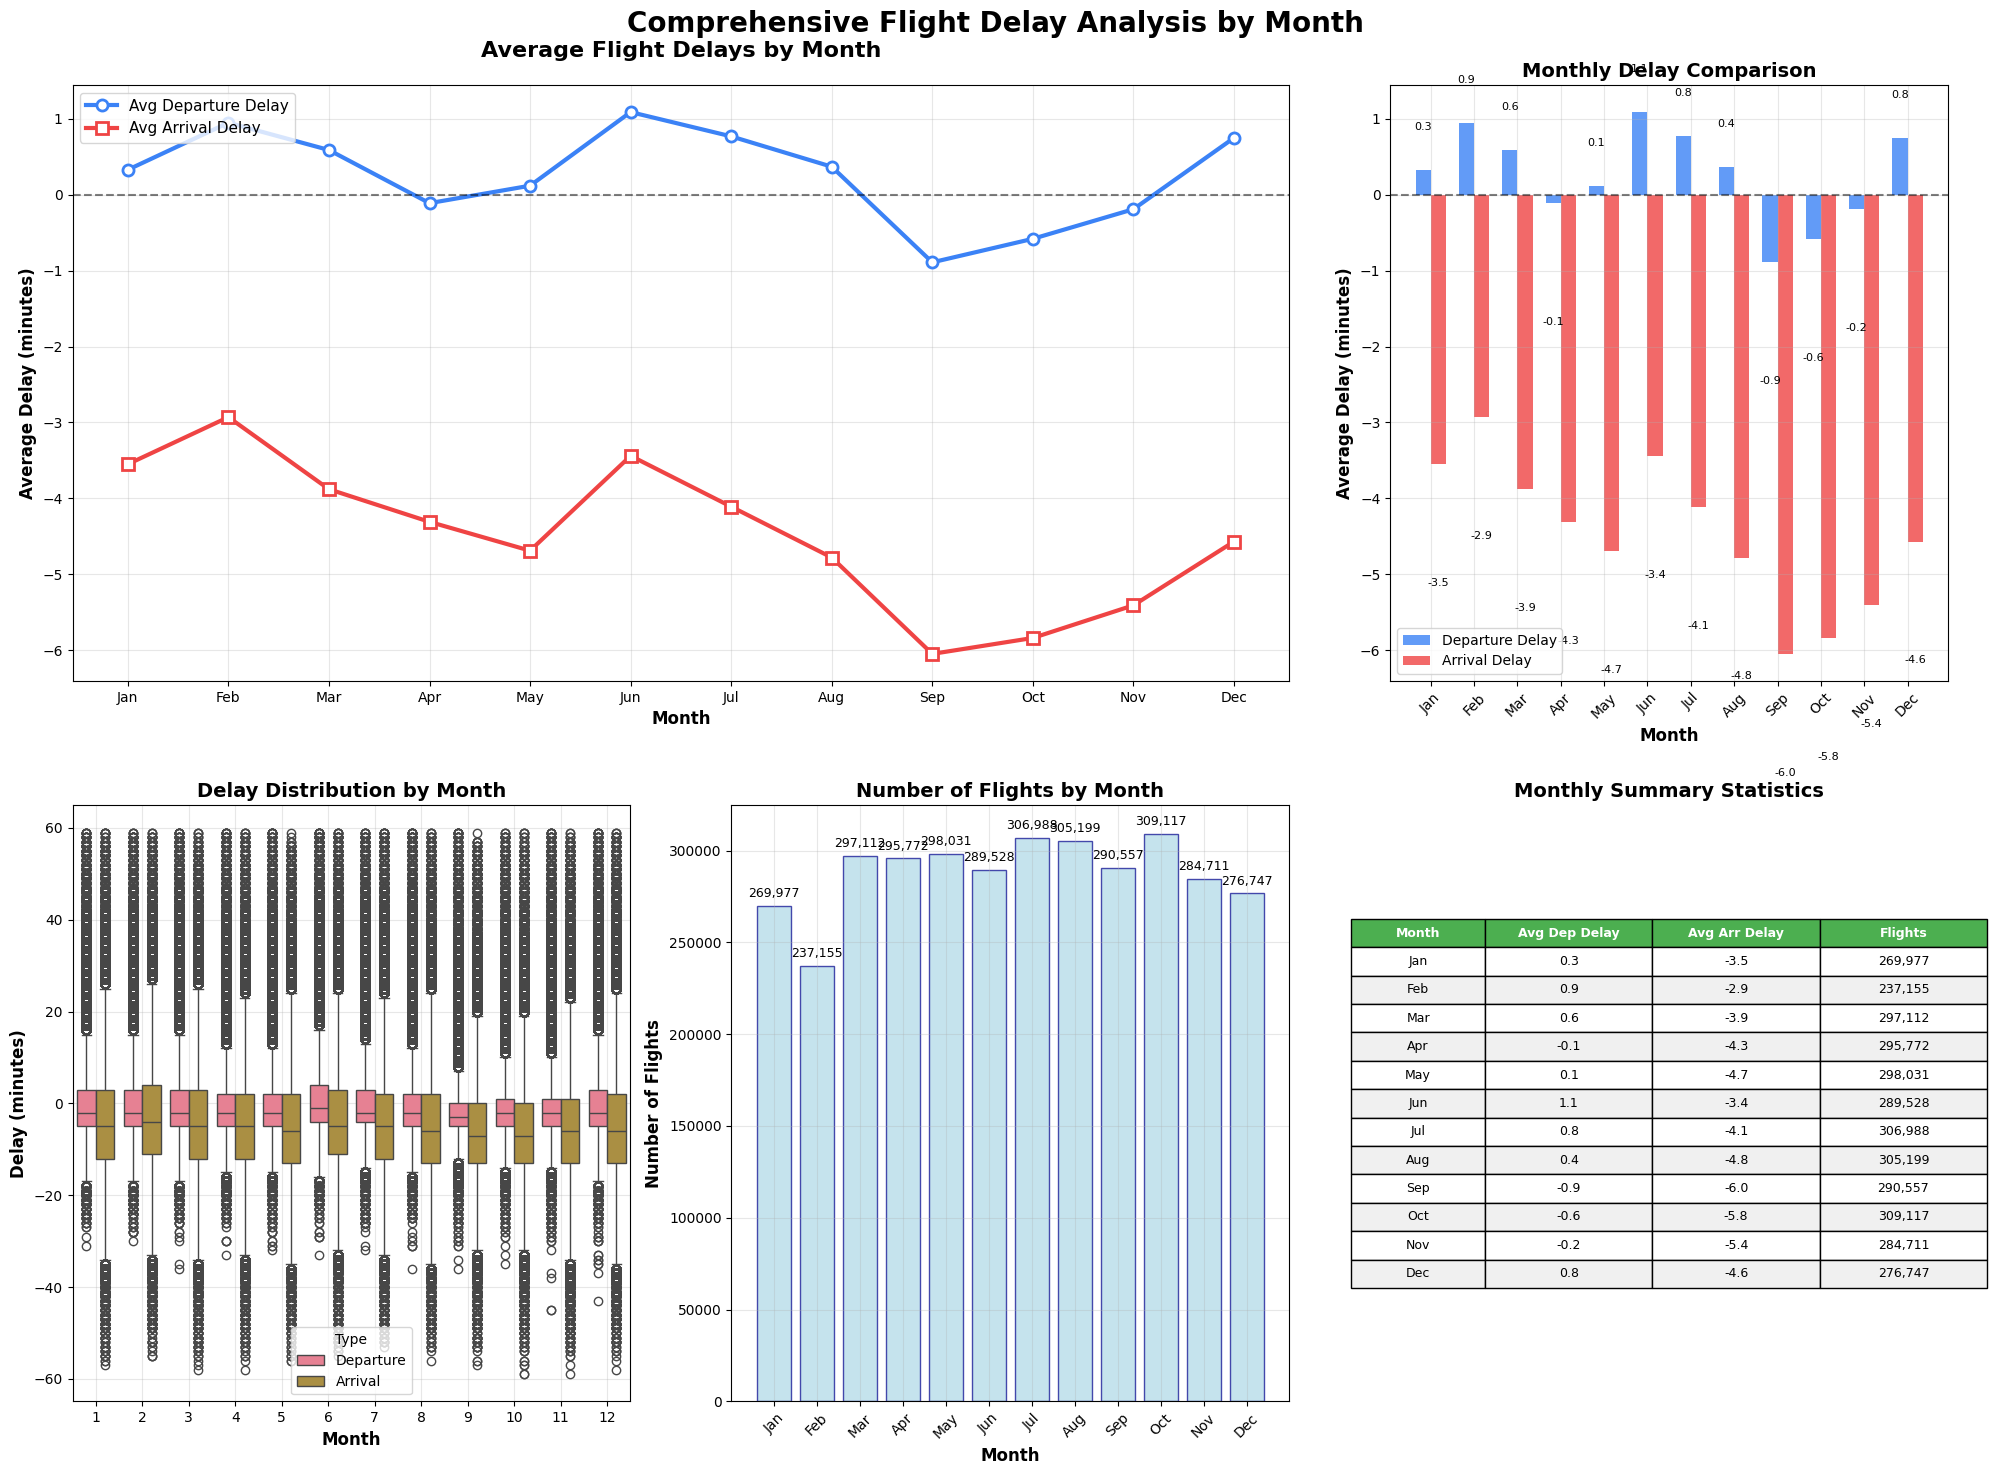

FLIGHT DELAY ANALYSIS SUMMARY
Total Flights Analyzed: 3,460,894
Overall Average Departure Delay: 0.27 minutes
Overall Average Arrival Delay: -4.46 minutes

Monthly Breakdown:
------------------------------------------------------------
Jan: Dep=   0.3min, Arr=  -3.5min, Flights=269,977
Feb: Dep=   0.9min, Arr=  -2.9min, Flights=237,155
Mar: Dep=   0.6min, Arr=  -3.9min, Flights=297,112
Apr: Dep=  -0.1min, Arr=  -4.3min, Flights=295,772
May: Dep=   0.1min, Arr=  -4.7min, Flights=298,031
Jun: Dep=   1.1min, Arr=  -3.4min, Flights=289,528
Jul: Dep=   0.8min, Arr=  -4.1min, Flights=306,988
Aug: Dep=   0.4min, Arr=  -4.8min, Flights=305,199
Sep: Dep=  -0.9min, Arr=  -6.0min, Flights=290,557
Oct: Dep=  -0.6min, Arr=  -5.8min, Flights=309,117
Nov: Dep=  -0.2min, Arr=  -5.4min, Flights=284,711
Dec: Dep=   0.8min, Arr=  -4.6min, Flights=276,747

Best Performance:
- Departure Delays: Sep
- Arrival Delays: Sep

Worst Performance:
- Departure Delays: Jun
- Arrival Delays: Feb


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

def analyze_flight_delays(df):
    """
    Analyze flight delays by month and create visualizations
    
    Parameters:
    df: DataFrame with columns MONTH, DEPARTURE_DELAY, ARRIVAL_DELAY
    """
    
    # Clean the data - handle missing values
    df_clean = df.copy()
    df_clean['DEPARTURE_DELAY'] = pd.to_numeric(df_clean['DEPARTURE_DELAY'], errors='coerce')
    df_clean['ARRIVAL_DELAY'] = pd.to_numeric(df_clean['ARRIVAL_DELAY'], errors='coerce')
    
    # Group by month and calculate statistics
    monthly_stats = df_clean.groupby('MONTH').agg({
        'DEPARTURE_DELAY': ['mean', 'median', 'std', 'count'],
        'ARRIVAL_DELAY': ['mean', 'median', 'std', 'count']
    }).round(2)
    
    # Flatten column names
    monthly_stats.columns = ['_'.join(col).strip() for col in monthly_stats.columns]
    monthly_stats = monthly_stats.reset_index()
    
    # Add month names for better visualization
    month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    monthly_stats['MONTH_NAME'] = monthly_stats['MONTH'].map(month_names)
    
    return monthly_stats

def create_comprehensive_visualization(df_correct_calculation_cleaned):
    """
    Create comprehensive flight delay analysis visualization
    """
    
    # Get monthly statistics
    monthly_stats = analyze_flight_delays(df_correct_calculation_cleaned)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))
    
    # Define colors
    dep_color = '#3B82F6'  # Blue
    arr_color = '#EF4444'  # Red
    
    # 1. Main Line Plot - Average Delays by Month
    ax1 = plt.subplot(2, 3, (1, 2))
    
    # Plot lines
    line1 = ax1.plot(monthly_stats['MONTH'], monthly_stats['DEPARTURE_DELAY_mean'], 
                     marker='o', linewidth=3, markersize=8, color=dep_color, 
                     label='Avg Departure Delay', markerfacecolor='white', markeredgewidth=2)
    
    line2 = ax1.plot(monthly_stats['MONTH'], monthly_stats['ARRIVAL_DELAY_mean'], 
                     marker='s', linewidth=3, markersize=8, color=arr_color, 
                     label='Avg Arrival Delay', markerfacecolor='white', markeredgewidth=2)
    
    ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Average Delay (minutes)', fontsize=12, fontweight='bold')
    ax1.set_title('Average Flight Delays by Month', fontsize=16, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=11, loc='upper left')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([monthly_stats[monthly_stats['MONTH']==i]['MONTH_NAME'].iloc[0] 
                         if i in monthly_stats['MONTH'].values else '' for i in range(1, 13)])
    
    # Add zero line for reference
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # 2. Bar Chart - Side by side comparison
    ax2 = plt.subplot(2, 3, 3)
    
    x = np.arange(len(monthly_stats))
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, monthly_stats['DEPARTURE_DELAY_mean'], width, 
                    label='Departure Delay', color=dep_color, alpha=0.8)
    bars2 = ax2.bar(x + width/2, monthly_stats['ARRIVAL_DELAY_mean'], width, 
                    label='Arrival Delay', color=arr_color, alpha=0.8)
    
    ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Average Delay (minutes)', fontsize=12, fontweight='bold')
    ax2.set_title('Monthly Delay Comparison', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(monthly_stats['MONTH_NAME'], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5 if height > 0 else height - 1.5,
                f'{height:.1f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)
    
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5 if height > 0 else height - 1.5,
                f'{height:.1f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)
    
    # 3. Box Plot - Distribution of delays
    ax3 = plt.subplot(2, 3, 4)
    
    # Prepare data for box plot
    delay_data = []
    months = []
    delay_types = []
    
    for month in sorted(monthly_stats['MONTH'].unique()):
        month_data = df_correct_calculation_cleaned[df_correct_calculation_cleaned['MONTH'] == month]
        
        # Departure delays
        dep_delays = month_data['DEPARTURE_DELAY'].dropna()
        delay_data.extend(dep_delays.values)
        months.extend([month] * len(dep_delays))
        delay_types.extend(['Departure'] * len(dep_delays))
        
        # Arrival delays
        arr_delays = month_data['ARRIVAL_DELAY'].dropna()
        delay_data.extend(arr_delays.values)
        months.extend([month] * len(arr_delays))
        delay_types.extend(['Arrival'] * len(arr_delays))
    
    box_df = pd.DataFrame({
        'Month': months,
        'Delay': delay_data,
        'Type': delay_types
    })
    
    # Limit extreme outliers for better visualization
    box_df = box_df[(box_df['Delay'] >= -60) & (box_df['Delay'] <= 120)]
    
    sns.boxplot(data=box_df, x='Month', y='Delay', hue='Type', ax=ax3)
    ax3.set_title('Delay Distribution by Month', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Delay (minutes)', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Flight Count by Month
    ax4 = plt.subplot(2, 3, 5)
    
    flight_counts = monthly_stats['DEPARTURE_DELAY_count']
    bars = ax4.bar(monthly_stats['MONTH_NAME'], flight_counts, 
                   color='lightblue', edgecolor='darkblue', alpha=0.7)
    
    ax4.set_title('Number of Flights by Month', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Month', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Number of Flights', fontsize=12, fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + max(flight_counts)*0.01,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)
    
    # 5. Summary Statistics Table
    ax5 = plt.subplot(2, 3, 6)
    ax5.axis('tight')
    ax5.axis('off')
    
    # Create summary statistics
    summary_data = []
    for _, row in monthly_stats.iterrows():
        summary_data.append([
            row['MONTH_NAME'],
            f"{row['DEPARTURE_DELAY_mean']:.1f}",
            f"{row['ARRIVAL_DELAY_mean']:.1f}",
            f"{int(row['DEPARTURE_DELAY_count']):,}"
        ])
    
    table = ax5.table(cellText=summary_data,
                      colLabels=['Month', 'Avg Dep Delay', 'Avg Arr Delay', 'Flights'],
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.2, 0.25, 0.25, 0.25])
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    # Style the table
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(color='white')
        else:
            cell.set_facecolor('#f0f0f0' if row % 2 == 0 else 'white')
    
    ax5.set_title('Monthly Summary Statistics', fontsize=14, fontweight='bold')
    
    # Overall title
    fig.suptitle('Comprehensive Flight Delay Analysis by Month', 
                fontsize=20, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return monthly_stats

def print_summary_statistics(monthly_stats):
    """
    Print detailed summary statistics
    """
    print("="*60)
    print("FLIGHT DELAY ANALYSIS SUMMARY")
    print("="*60)
    
    total_flights = monthly_stats['DEPARTURE_DELAY_count'].sum()
    avg_dep_delay = monthly_stats['DEPARTURE_DELAY_mean'].mean()
    avg_arr_delay = monthly_stats['ARRIVAL_DELAY_mean'].mean()
    
    print(f"Total Flights Analyzed: {total_flights:,}")
    print(f"Overall Average Departure Delay: {avg_dep_delay:.2f} minutes")
    print(f"Overall Average Arrival Delay: {avg_arr_delay:.2f} minutes")
    
    print("\nMonthly Breakdown:")
    print("-" * 60)
    for _, row in monthly_stats.iterrows():
        print(f"{row['MONTH_NAME']:>3}: Dep={row['DEPARTURE_DELAY_mean']:6.1f}min, "
              f"Arr={row['ARRIVAL_DELAY_mean']:6.1f}min, Flights={int(row['DEPARTURE_DELAY_count']):,}")
    
    # Find best and worst months
    best_dep_month = monthly_stats.loc[monthly_stats['DEPARTURE_DELAY_mean'].idxmin(), 'MONTH_NAME']
    worst_dep_month = monthly_stats.loc[monthly_stats['DEPARTURE_DELAY_mean'].idxmax(), 'MONTH_NAME']
    best_arr_month = monthly_stats.loc[monthly_stats['ARRIVAL_DELAY_mean'].idxmin(), 'MONTH_NAME']
    worst_arr_month = monthly_stats.loc[monthly_stats['ARRIVAL_DELAY_mean'].idxmax(), 'MONTH_NAME']
    
    print(f"\nBest Performance:")
    print(f"- Departure Delays: {best_dep_month}")
    print(f"- Arrival Delays: {best_arr_month}")
    print(f"\nWorst Performance:")
    print(f"- Departure Delays: {worst_dep_month}")
    print(f"- Arrival Delays: {worst_arr_month}")

# Main execution
if __name__ == "__main__":
    # Assuming your dataframe is called 'df_correct_calculation_cleaned'
    # Run the analysis
    monthly_stats = create_comprehensive_visualization(df_correct_calculation_cleaned)
    
    # Print summary statistics
    print_summary_statistics(monthly_stats)
    
    # Optional: Save the monthly statistics to CSV
    # monthly_stats.to_csv('monthly_flight_delay_stats.csv', index=False)
    # print("\nMonthly statistics saved to 'monthly_flight_delay_stats.csv'")

# Alternative simple version if you want just the basic plot:
def simple_delay_plot(df):
    """
    Create a simple line plot for quick analysis
    """
    monthly_avg = df.groupby('MONTH')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_avg.index, monthly_avg['DEPARTURE_DELAY'], 
             marker='o', linewidth=2, label='Departure Delay', color='blue')
    plt.plot(monthly_avg.index, monthly_avg['ARRIVAL_DELAY'], 
             marker='s', linewidth=2, label='Arrival Delay', color='red')
    
    plt.title('Average Flight Delays by Month', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Delay (minutes)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13))
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Uncomment the line below if you want the simple version instead:
# simple_delay_plot(df_correct_calculation_cleaned)